In [16]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_json('../Data/combined.json')

In [19]:
df.head()

,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleReason,PropertyClass,SaleWarning,Area,SqFtLot,LakeWashington,...,TidelandShoreland,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,SqFtTotLiving,SqFtDeck,SqFtOpenPorch,Condition,year
95779180,1546300800000,644950,2,6,1,8,4,27.0,6501.0,0.0,...,0.0,0.0,0.0,N,N,3265.0,0.0,30.0,3.0,2019
857600280,1546300800000,449950,2,6,1,8,,57.0,3599.0,0.0,...,0.0,0.0,0.0,N,N,2360.0,0.0,180.0,3.0,2019
769100220,1546300800000,544950,3,6,1,8,,41.0,10051.0,0.0,...,0.0,0.0,0.0,N,N,3050.0,0.0,320.0,3.0,2019
531510630,1546300800000,477000,3,6,18,8,18 51 52,34.0,9082.0,0.0,...,0.0,0.0,0.0,N,N,1620.0,0.0,0.0,4.0,2019
857600260,1546300800000,583950,2,6,1,8,,57.0,5944.0,0.0,...,0.0,0.0,0.0,N,N,3270.0,0.0,250.0,3.0,2019


In [22]:
df.SalePrice.mean()

1826994.8453734834

In [47]:
# We had enough data that I dropped all the NAN's. Could go back if we decide we want to look at them. about 8K out of the 36K 
df.dropna(inplace=True)

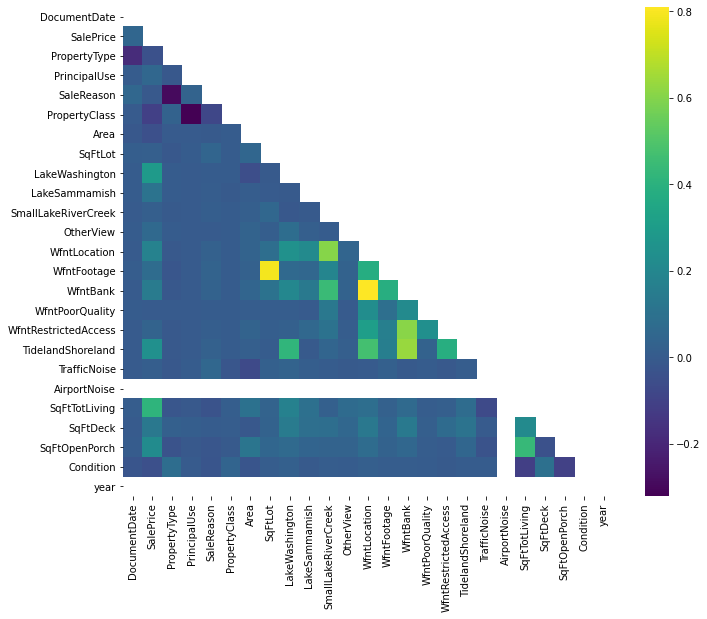

In [48]:
# Heat map comparing the respective columns. Looks like we can take out Airport noise as it has no efffect. 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [55]:
# created a first model dataframe to only inclue SalePrice and sqfttotliving
fsm_df = df[["SalePrice", "SqFtTotLiving"]].copy()

In [57]:
#First model using SalePrice as target variable and sqFtTotLiving as feature
# real low R-Squared. Doesnt necisarrily mean a bad thing if this is our very first model 
fsm = ols(formula="SalePrice ~ SqFtTotLiving", data=fsm_df)
fsm_results = fsm.fit()

In [58]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     5396.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:37:57   Log-Likelihood:            -3.8504e+05
No. Observations:               25679   AIC:                         7.701e+05
Df Residuals:                   25677   BIC:                         7.701e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.943e+04    1.2e+04      1.622      0.105   -4054.122    4.29e+04
SqFtTotLiving   368.3709      5.015     73.457      0.000     358.542     378.200
==============================================================================
Omnibus:                    50432.432   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        185484705.274
Skew:                          15.614   Prob(JB):                         0.00
Kurtosis:                     418.189   Cond. No.                     5.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""